In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/525_1310.csv")
df = df.iloc[100:]
df = df.iloc[:-100]
df.head()

,cycles:u,instructions:u,branch-misses:u,cache-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,...,ocr.hwpf_l2_rfo.l3_miss:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u,l2_rqsts.swpf_miss:u,page-faults:u,mem-stores:u,l1d_pend_miss.pending:u,frontend_retired.itlb_miss:u,IPC,CPI
100,446846599,1571072583,2016302,160775,2878764,2338994,14719,3890,1832644,1048,...,11104,7553,2384037,926,0,101058979,14307135,1933,3.515910,0.284421
101,454104339,1596797765,1781209,347887,3166468,2673639,26740,45670,1539105,1543,...,15165,16971,2979646,2805,0,98180746,21142117,2577,3.516368,0.284384
102,456415704,1605004789,1898072,160221,2822895,2746330,13906,4243,1906232,1451,...,19554,10334,2825147,1077,0,98346757,17050902,1703,3.516542,0.284370
103,455434918,1602272681,2229713,102051,2379898,2689440,7508,3375,2174911,976,...,15536,7464,2854270,945,0,103596299,11841921,1703,3.518116,0.284243
104,455911445,1604206165,2257467,130551,2451492,2856395,9206,3516,2152159,1778,...,14767,7032,2855952,951,0,102349336,11077135,1442,3.518679,0.284198


In [ ]:
df.shape

(1562, 30)

In [ ]:
print(df.columns.values.tolist())

['cycles:u', 'instructions:u', 'branch-misses:u', 'cache-misses:u', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss:u', 'l2_rqsts.demand_data_rd_miss:u', 'l2_rqsts.all_demand_miss:u', 'dtlb_load_misses.walk_pending:u', 'itlb_misses.walk_pending:u', 'dtlb_store_misses.walk_pending:u', 'dtlb_load_misses.walk_pending:u.1', 'offcore_requests.l3_miss_demand_data_rd:u', 'ocr.hwpf_l2_rfo.l3_miss:u', 'ocr.demand_data_rd.l3_miss:u', 'icache_64b.iftag_miss:u', 'l2_rqsts.swpf_miss:u', 'page-faults:u', 'mem-stores:u', 'l1d_pend_miss.pending:u', 'frontend_retired.itlb_miss:u', 'IPC', 'CPI']


In [ ]:
#Setting the value for X and Y
X = df[['branch-misses:u', 'cache-misses:u', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss:u', 'l2_rqsts.demand_data_rd_miss:u', 'l2_rqsts.all_demand_miss:u', 'dtlb_load_misses.walk_pending:u', 'itlb_misses.walk_pending:u', 'dtlb_store_misses.walk_pending:u', 'dtlb_load_misses.walk_pending:u.1', 'offcore_requests.l3_miss_demand_data_rd:u', 'ocr.hwpf_l2_rfo.l3_miss:u', 'ocr.demand_data_rd.l3_miss:u', 'icache_64b.iftag_miss:u', 'l2_rqsts.swpf_miss:u', 'page-faults:u', 'mem-stores:u', 'l1d_pend_miss.pending:u', 'frontend_retired.itlb_miss:u']]
i = df['instructions:u'].values.reshape(-1,1)
y = df['CPI']
X = np.divide(X,i)
df_new = X.copy()
df_new['CPI'] = y

<Axes: >

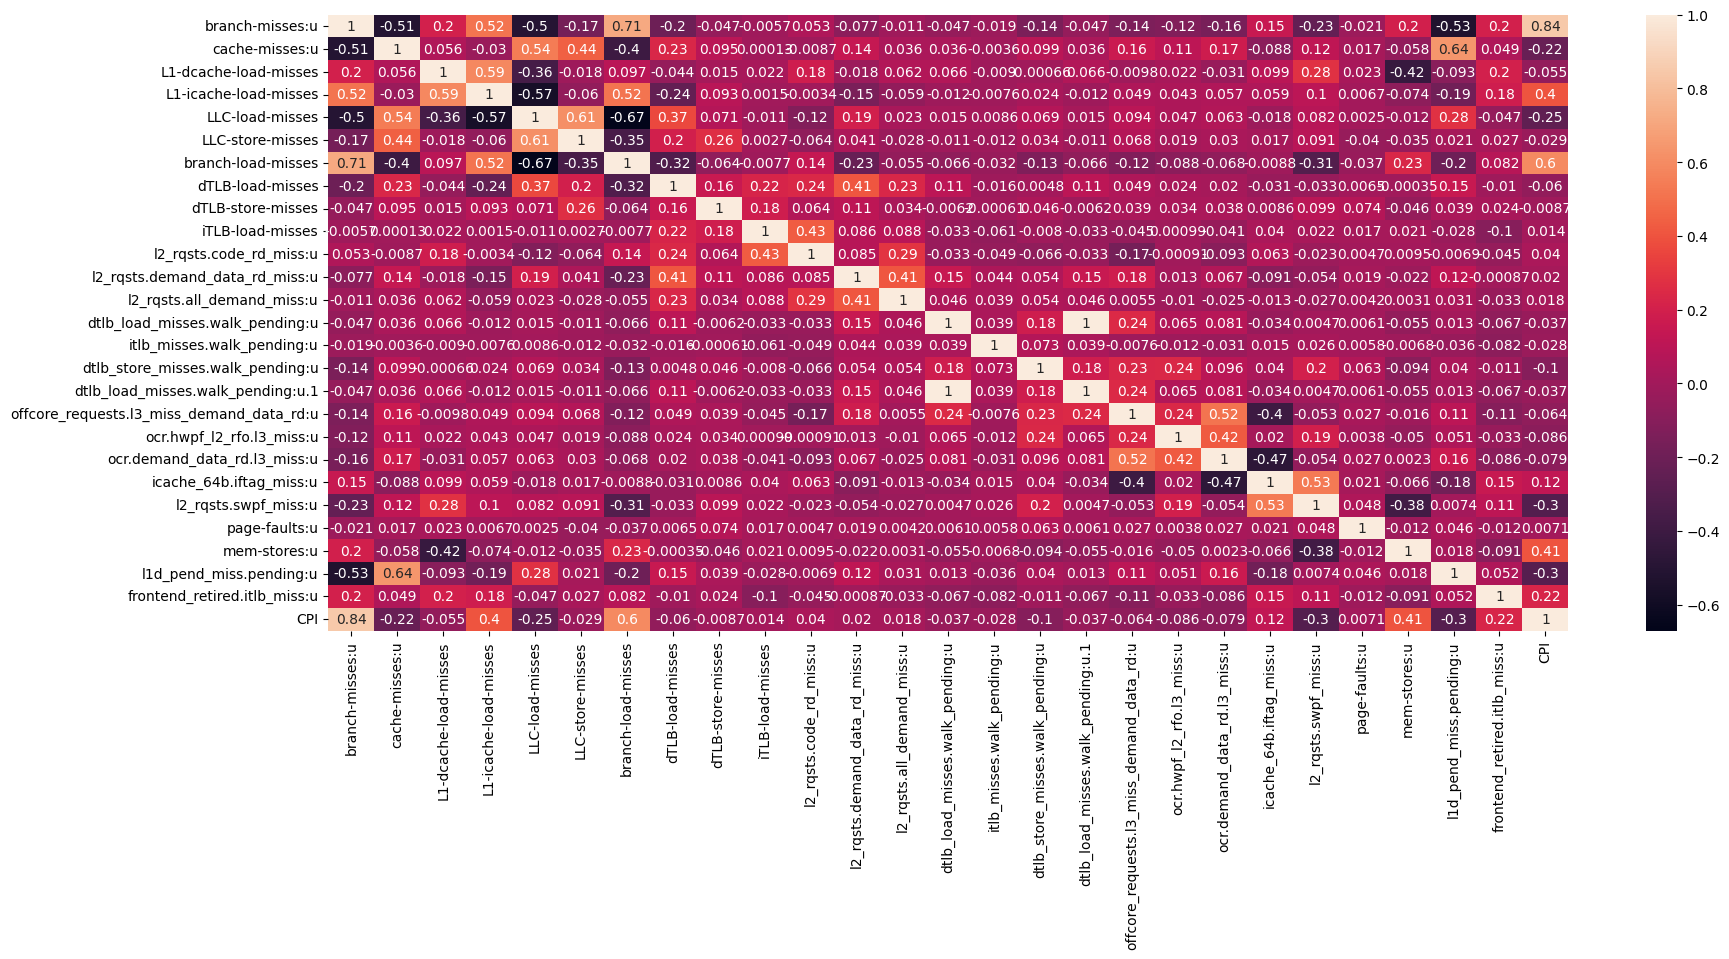

In [ ]:
corr = df_new.corr()
plt.figure (figsize = (20,8))
sns.heatmap(corr, annot = True)

In [ ]:
 X.drop(['l2_rqsts.all_demand_miss:u','dTLB-load-misses','ocr.demand_data_rd.l3_miss:u','offcore_requests.l3_miss_demand_data_rd:u','dtlb_store_misses.walk_pending:u','LLC-load-misses','cache-misses:u','l1d_pend_miss.pending:u','dtlb_load_misses.walk_pending:u','LLC-store-misses','l2_rqsts.code_rd_miss:u','dtlb_load_misses.walk_pending:u.1','L1-dcache-load-misses','branch-load-misses','dTLB-store-misses','itlb_misses.walk_pending:u','ocr.hwpf_l2_rfo.l3_miss:u','l2_rqsts.swpf_miss:u'],axis=1,inplace = True)
 X.head()

,branch-misses:u,L1-icache-load-misses,iTLB-load-misses,l2_rqsts.demand_data_rd_miss:u,icache_64b.iftag_miss:u,page-faults:u,mem-stores:u,frontend_retired.itlb_miss:u
100,0.001283,0.001489,1.400317e-07,0.000043,0.001517,0.0,0.064325,1.230370e-06
101,0.001115,0.001674,2.818140e-08,0.000021,0.001866,0.0,0.061486,1.613855e-06
102,0.001183,0.001711,9.657292e-08,0.000037,0.001760,0.0,0.061275,1.061056e-06
103,0.001392,0.001679,2.078298e-07,0.000021,0.001781,0.0,0.064656,1.062865e-06
104,0.001407,0.001781,9.038738e-08,0.000016,0.001780,0.0,0.063801,8.988870e-07


In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()

In [ ]:
#Splitting dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

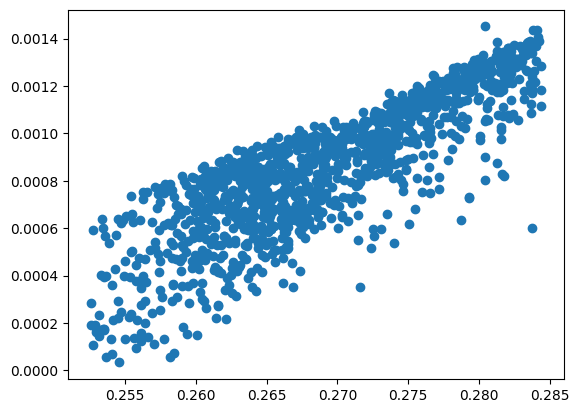

In [ ]:
plt.scatter(y_train,X_train.iloc[:,0].values)
plt.show()

In [ ]:
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.21958288584656732
Coefficients:


[('branch-misses:u', 21.417395570619078),
 ('L1-icache-load-misses', 0.3950663131367277),
 ('iTLB-load-misses', 219.7146872368477),
 ('l2_rqsts.demand_data_rd_miss:u', 25.61208694157674),
 ('icache_64b.iftag_miss:u', 0.3556381594862765),
 ('page-faults:u', 9045.555834210809),
 ('mem-stores:u', 0.4754501001646133),
 ('frontend_retired.itlb_miss:u', 893.9874014442757)]

'LLC-store-misses','L1-icache-load-misses','l2_rqsts.code_rd_miss:u','dtlb_load_misses.walk_pending:u1'

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.26869828 0.26526486 0.26418827 0.25492063 0.27352149 0.26571387
 0.26570366 0.25812631 0.26411351 0.2729321  0.26189307 0.26129761
 0.26967512 0.26060005 0.26778988 0.26896944 0.25884266 0.26756189
 0.27100461 0.26926318 0.27152015 0.26317456 0.27696941 0.26273553
 0.26667664 0.27683296 0.26547055 0.26547414 0.26475178 0.27582692
 0.27513129 0.2699287  0.26979272 0.26579789 0.26192565 0.27001366
 0.2690454  0.27882768 0.270773   0.25438062 0.26576581 0.26076639
 0.27402693 0.26515505 0.27858859 0.26365177 0.28258658 0.262687
 0.26388424 0.26829444 0.26130445 0.26994003 0.2764528  0.26743587
 0.25620892 0.26507012 0.27836321 0.27062622 0.27968793 0.25598836
 0.26982123 0.26553699 0.27640727 0.26678211 0.27040494 0.28064312
 0.27172433 0.27014794 0.28188375 0.27168293 0.27671534 0.25900521
 0.26879067 0.26467905 0.26188324 0.26684649 0.27266297 0.27617656
 0.27084638 0.25958417 0.26646601 0.27051899 0.26658965 0.27448875
 0.26990396 0.27140426 0.27263146 0.271

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
991,0.266354,0.268698
1075,0.265387,0.265265
1371,0.261432,0.264188
1552,0.257775,0.254921
599,0.273335,0.273521


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
r2 = mlr.score(X_test,y_test)
print('R squared: {:.2f}'.format(r2*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 79.50
Mean Absolute Error: 0.0027001431181784678
Mean Square Error: 1.1959332559607936e-05
Root Mean Square Error: 0.0034582267941255583


In [ ]:
final = X.mean()
print(final)

branch-misses:u                   8.497345e-04
L1-icache-load-misses             1.559719e-03
iTLB-load-misses                  2.959496e-07
l2_rqsts.demand_data_rd_miss:u    4.153473e-05
icache_64b.iftag_miss:u           1.558709e-03
page-faults:u                     1.394260e-09
mem-stores:u                      5.808575e-02
frontend_retired.itlb_miss:u      1.378566e-06
dtype: float64


In [ ]:
y_mean = y.mean()
print(y_mean)

0.2689105549705506


In [ ]:
R = np.multiply(final,mlr.coef_)
print(R)
print(R.sum()+mlr.intercept_)

branch-misses:u                   0.018199
L1-icache-load-misses             0.000616
iTLB-load-misses                  0.000065
l2_rqsts.demand_data_rd_miss:u    0.001064
icache_64b.iftag_miss:u           0.000554
page-faults:u                     0.000013
mem-stores:u                      0.027617
frontend_retired.itlb_miss:u      0.001232
dtype: float64
0.26894323708887835


In [ ]:
finaly = y.mean()
print(finaly)

0.2689105549705506


In [ ]:
n = df_new.shape[0]
p = X.shape[1]
print(n,p)

1562 8


In [ ]:
#Adjusted r2 score
r2adj = 1-(1-r2)*(n-1)/(n-p-1)
print(r2adj*100)

79.3975677307056


In [ ]:
#Residuals
residuals = (y_test - y_pred_mlr)
print(residuals)


991    -0.002344
1075    0.000122
1371   -0.002756
1552    0.002855
599    -0.000187
          ...   
465    -0.000098
1164    0.005511
1145    0.001040
813    -0.000706
1585   -0.002172
Name: CPI, Length: 313, dtype: float64


In [ ]:

#F statistic
fstat = (r2/(1-r2))*((n-p-1)/p)
print(fstat)
print(n-p-1)
print(p)

752.9719128766982
1553
8


In [ ]:
# p-value
from scipy.stats import f
p_value = 1-f.cdf(fstat, p, n-p-1)
print(p_value)


1.1102230246251565e-16


In [ ]:
import pandas as pd
R = pd.concat([pd.Series([mlr.intercept_],index = ['Base CPI']), R])
print(R)

Base CPI                          0.219583
branch-misses:u                   0.018199
L1-icache-load-misses             0.000616
iTLB-load-misses                  0.000065
l2_rqsts.demand_data_rd_miss:u    0.001064
icache_64b.iftag_miss:u           0.000554
page-faults:u                     0.000013
mem-stores:u                      0.027617
frontend_retired.itlb_miss:u      0.001232
dtype: float64


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted values')]

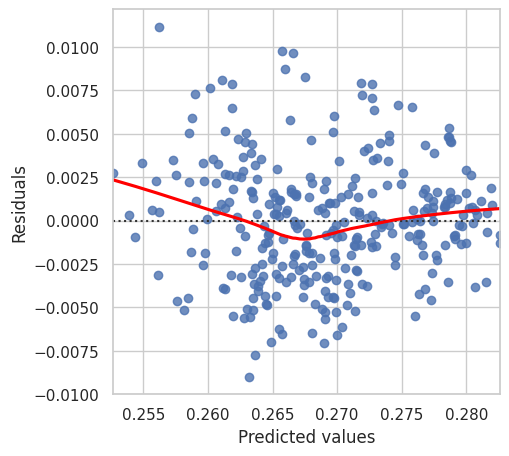

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred_mlr,y=residuals,ax=ax, lowess=True, line_kws={"color": "red"})
ax.set(ylabel='Residuals',xlabel='Predicted values')

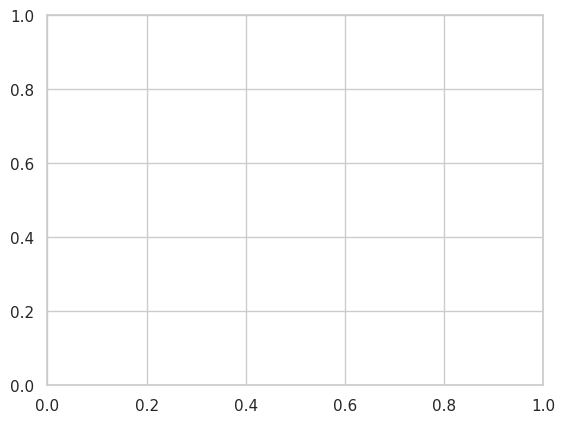

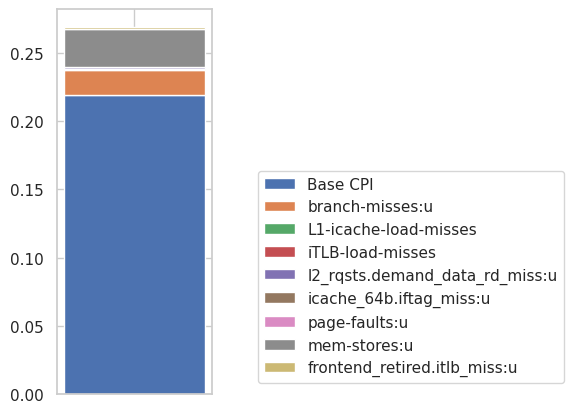

In [ ]:
fig, ax = plt.subplots()
groups = ['']
plt.figure (figsize = (2,5))
# Stacked bar chart with loop
for i in range(len(R)):
  plt.bar(groups, R[i],label = R.index[i], bottom = np.sum(R[:i], axis = 0))

plt.legend(bbox_to_anchor = (1.25, 0.6), loc='upper left')
plt.tight_layout()